In [1]:
from funciones_helmholtz_bem import Square
from funciones_helmholtz_bem import frequencyToWavenumber
from funciones_helmholtz_bem import solveInteriorBoundary
from funciones_helmholtz_bem import solveInterior
from funciones_helmholtz_bem import phi_test_problem_1_2
from funciones_helmholtz_bem import plot_oriented_edges
from funciones_helmholtz_bem import plot_edge_scalar_field
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# reload kernel
%load_ext autoreload
%autoreload 2

In [2]:
# Parámetros físicos del problema
c = 344.0            # Velocidad del sonido en el aire [m/s]
frequency = 400.0    # Frecuencia de la onda [Hz]
density= 1.205        # Densidad del medio [kg/m^3]
k = frequencyToWavenumber(frequency)  # Número de onda correspondiente

# Generación de la malla cuadrada
aVertex, aElement = Square()          # Nodos y elementos de la malla
size = aElement.shape[0]              # Número de elementos en la malla

# Inicialización de los arreglos para las condiciones de contorno
alpha = np.full(size, 1.0, dtype=complex)   # Coeficiente de Robin (α)
beta  = np.full(size, 0.0, dtype=complex)   # Coeficiente de Robin (β)
f     = np.empty(size, dtype=complex)       # Término fuente en la frontera
phi   = np.full(size, 0.0, dtype=complex)   # Potencial escalar (campo total)
v     = np.full(size, 0.0, dtype=complex)   # Derivada normal del potencial

# Cálculo de centros de los elementos y sus longitudes
aCenters = 0.5 * (aVertex[aElement[:, 0]] + aVertex[aElement[:, 1]])
aLength = np.linalg.norm(aVertex[aElement[:, 0]] - aVertex[aElement[:, 1]], axis=1)

# Definición del término fuente f como función del centro de los elementos
f[:] = np.sin(k / np.sqrt(2.0) * aCenters[:, 0]) * np.sin(k / np.sqrt(2.0) * aCenters[:, 1])

# Definición de puntos interiores donde se evaluará la solución
interiorPoints = np.array([
    [0.0250, 0.0250],
    [0.0750, 0.0250],
    [0.0250, 0.0750],
    [0.0750, 0.0750],
    [0.0500, 0.0500]
], dtype=np.float32)

# Potencial incidente en los puntos interiores (inicialmente cero)
interiorIncidentPhi = np.zeros(interiorPoints.shape[0], dtype=complex)

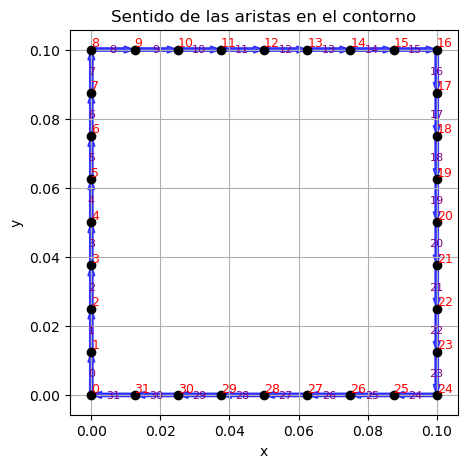

In [3]:
plot_oriented_edges(aVertex, aElement)

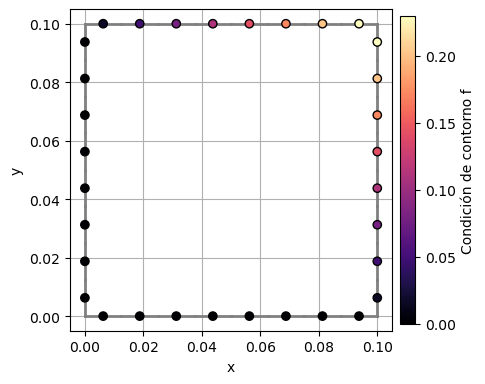

In [4]:
plot_edge_scalar_field(aCenters, aVertex, aElement, f, title="")

In [5]:
v, phi = solveInteriorBoundary(k, alpha, beta, f, phi, v, aVertex, aElement, c, density)

In [6]:
interiorPhi = solveInterior(k, v, phi, interiorIncidentPhi, interiorPoints, aVertex, aElement)

In [7]:
exact_sol = phi_test_problem_1_2(interiorPoints[:, 0], interiorPoints[:, 1], k)
num_sol = interiorPhi.real

In [8]:
data = {
    "Punto Interior": [f"({x:.3f}, {y:.3f})" for x, y in interiorPoints],
    "Solución Exacta": np.round(exact_sol,4),
    "Solución Numérica": np.round(num_sol,4)
}
df = pd.DataFrame(data)

# Mostrar la tabla
print(df)

   Punto Interior  Solución Exacta  Solución Numérica
0  (0.025, 0.025)           0.0166             0.0159
1  (0.075, 0.025)           0.0487             0.0482
2  (0.025, 0.075)           0.0487             0.0482
3  (0.075, 0.075)           0.1428             0.1434
4  (0.050, 0.050)           0.0653             0.0650
